# Week 1 - Data Exploration


In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

In [61]:
sample_submission = pd.read_csv("../data/submission_format.csv")

X_test = pd.read_csv("../data/test_values.csv")
X_train = pd.read_csv("../data/train_values.csv")
y_train = pd.read_csv("../data/train_labels.csv")

In [62]:
X_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [65]:
df = X_train.merge(y_train, on="building_id")  # noqa: PD901
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

## Missing Values

Analyze missing values and find uninformative columns


In [66]:
df.isna().sum().any()

False

## Univariate Analysis

Analyze the distributino of individual features. Are there any imbalances or outliers?


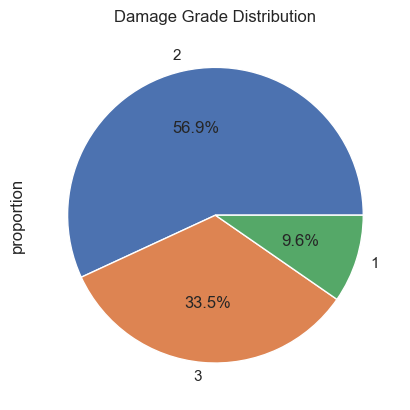

In [67]:
df.damage_grade.value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.title("Damage Grade Distribution")
plt.show()

In [68]:
cat_cols = X_train.select_dtypes(include="object").columns
numeric_cols = X_train.select_dtypes(include="int64").columns
binary_cols = [col for col in X_train.columns if col.startswith("has")]
numeric_cols = [
    col for col in numeric_cols if col not in binary_cols or col != "building_id"
]

df[cat_cols].nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
legal_ownership_status     4
dtype: int64

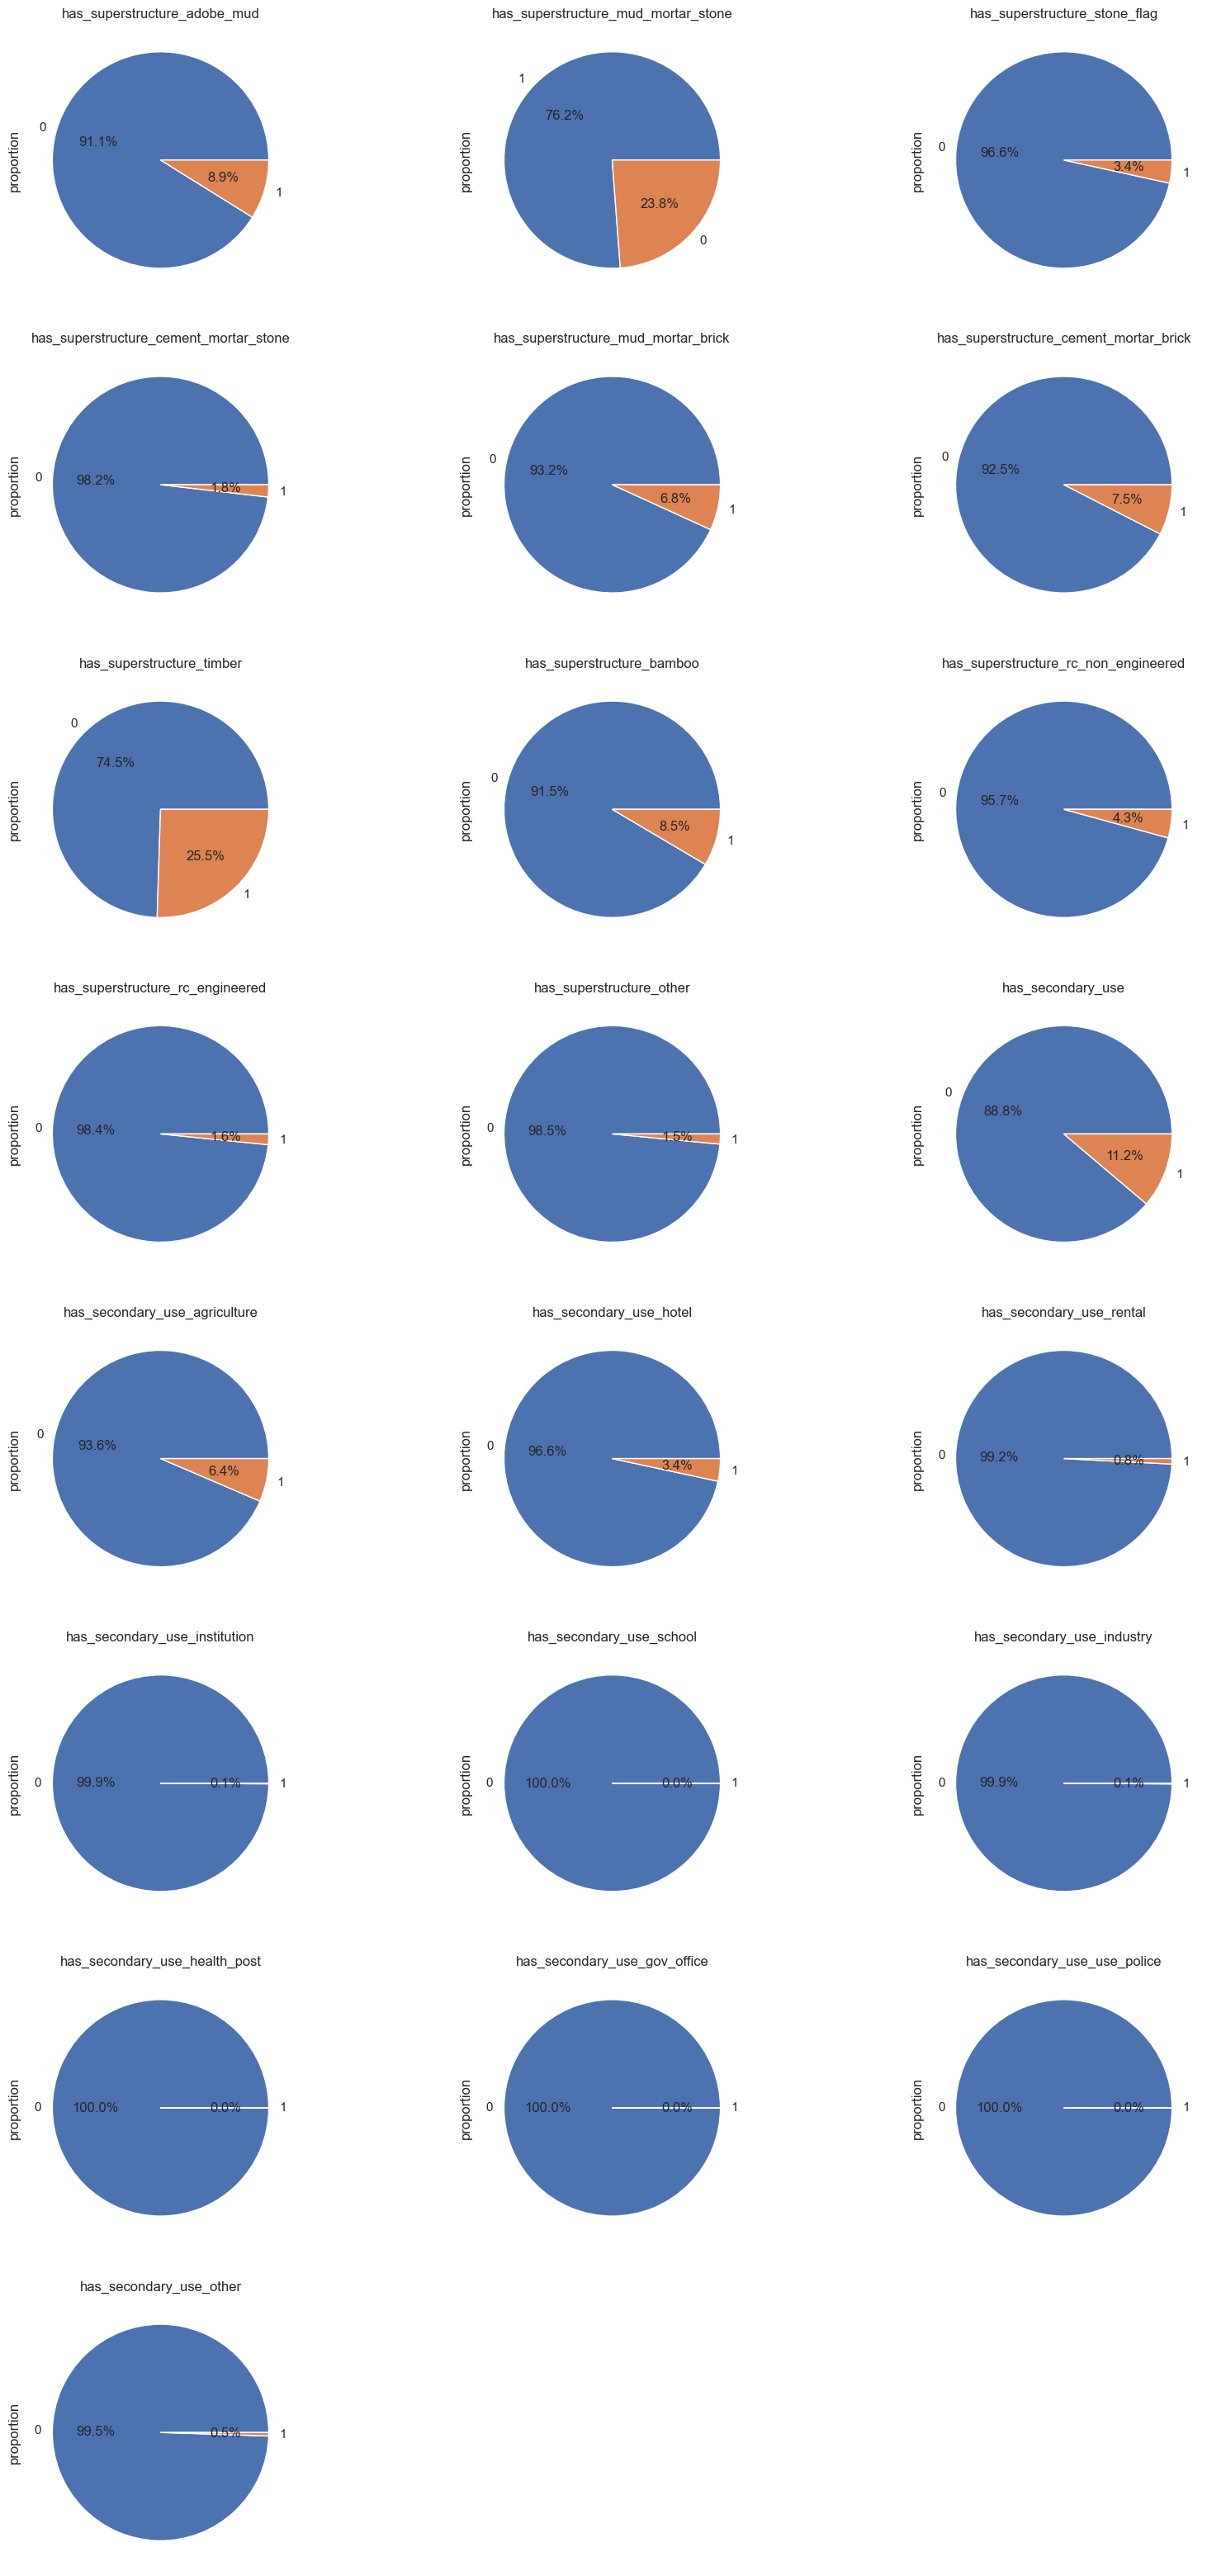

In [69]:
n = len(binary_cols)
fig = plt.figure(figsize=(20, 40))
for i, col in enumerate(binary_cols):
    ax = plt.subplot(n // 3 + 1, 3, i + 1)
    df[col].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
    ax.set_title(col)

<Axes: >

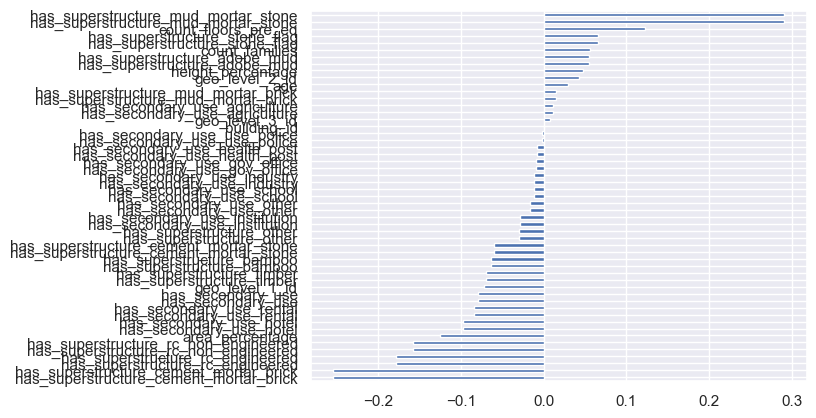

In [70]:
# correlation with target
corr_target = df[numeric_cols + binary_cols].corrwith(y_train.damage_grade)
corr_target.sort_values().plot.barh()

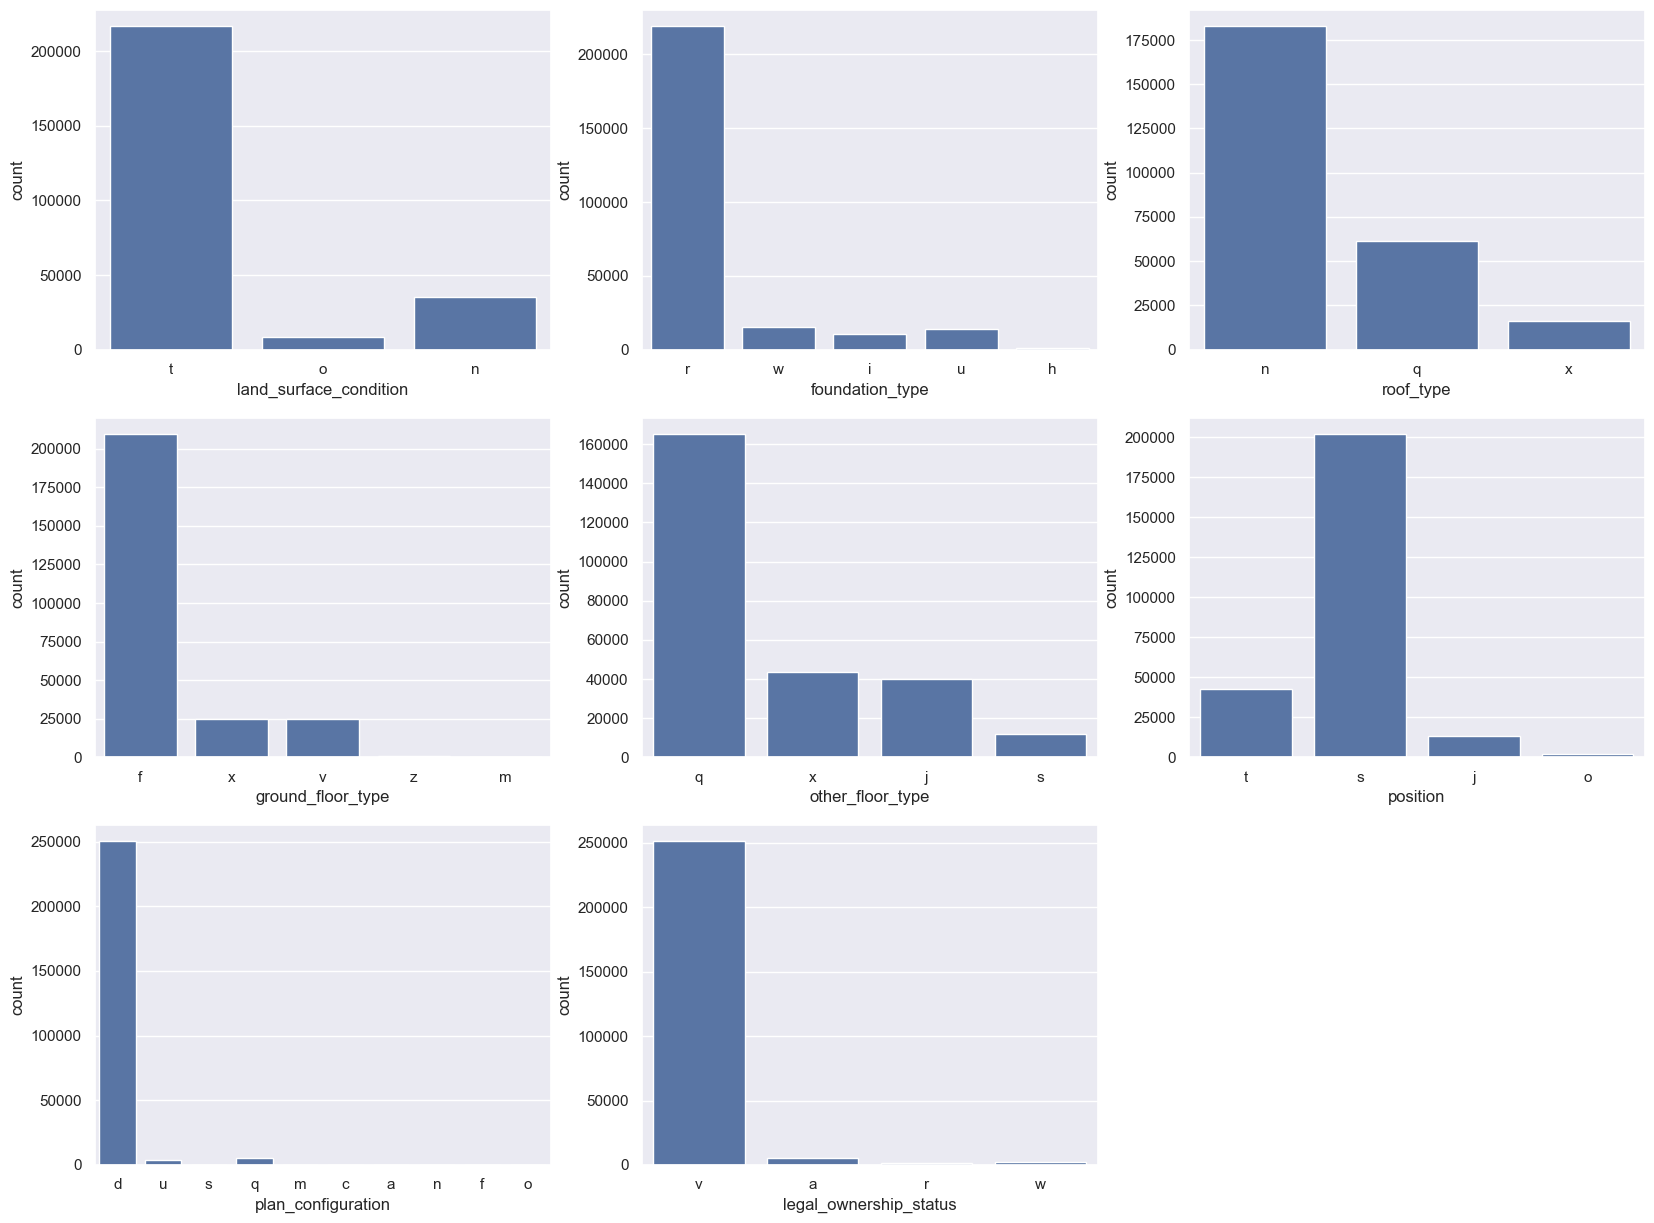

In [71]:
# visualize categorical columns

n = len(cat_cols)
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    ax = plt.subplot(n // 3 + 1, 3, i + 1)
    ax = sns.countplot(data=df, x=col)

## Multivariate Analysis

Analyze relationship between features. Are there any redundancies?

Analyze relationship between features and target variable. Are there any features that are highly correlated with the target variable?


<Axes: >

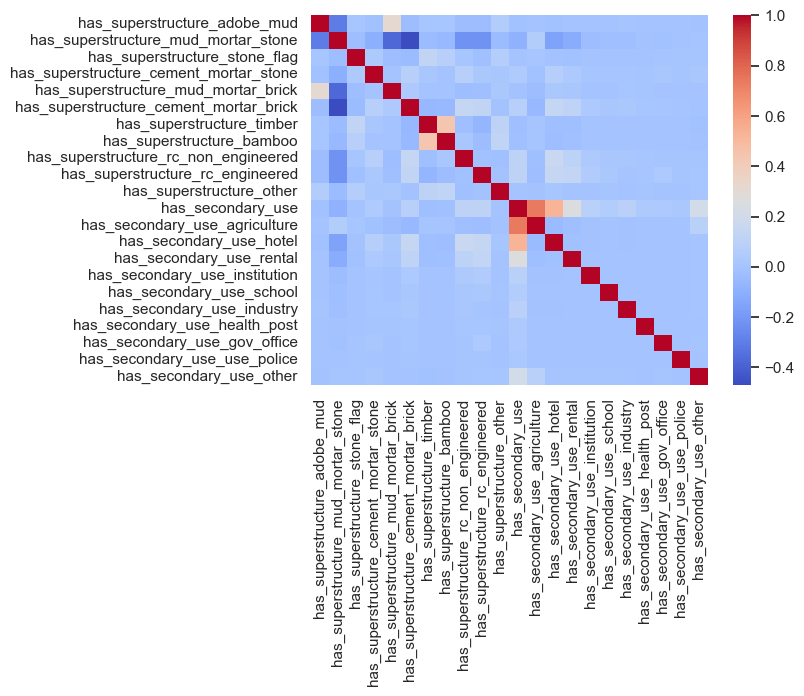

In [72]:
corr = df[binary_cols].corr()
sns.heatmap(corr, cmap="coolwarm")

array([[<Axes: title={'center': 'building_id'}>,
        <Axes: title={'center': 'geo_level_1_id'}>,
        <Axes: title={'center': 'geo_level_2_id'}>,
        <Axes: title={'center': 'geo_level_3_id'}>,
        <Axes: title={'center': 'count_floors_pre_eq'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'area_percentage'}>,
        <Axes: title={'center': 'height_percentage'}>,
        <Axes: title={'center': 'has_superstructure_adobe_mud'}>,
        <Axes: title={'center': 'has_superstructure_mud_mortar_stone'}>,
        <Axes: title={'center': 'has_superstructure_stone_flag'}>,
        <Axes: title={'center': 'has_superstructure_cement_mortar_stone'}>],
       [<Axes: title={'center': 'has_superstructure_mud_mortar_brick'}>,
        <Axes: title={'center': 'has_superstructure_cement_mortar_brick'}>,
        <Axes: title={'center': 'has_superstructure_timber'}>,
        <Axes: title={'center': 'has_superstructure_bamboo'}>,
        <Axes: title={'center'

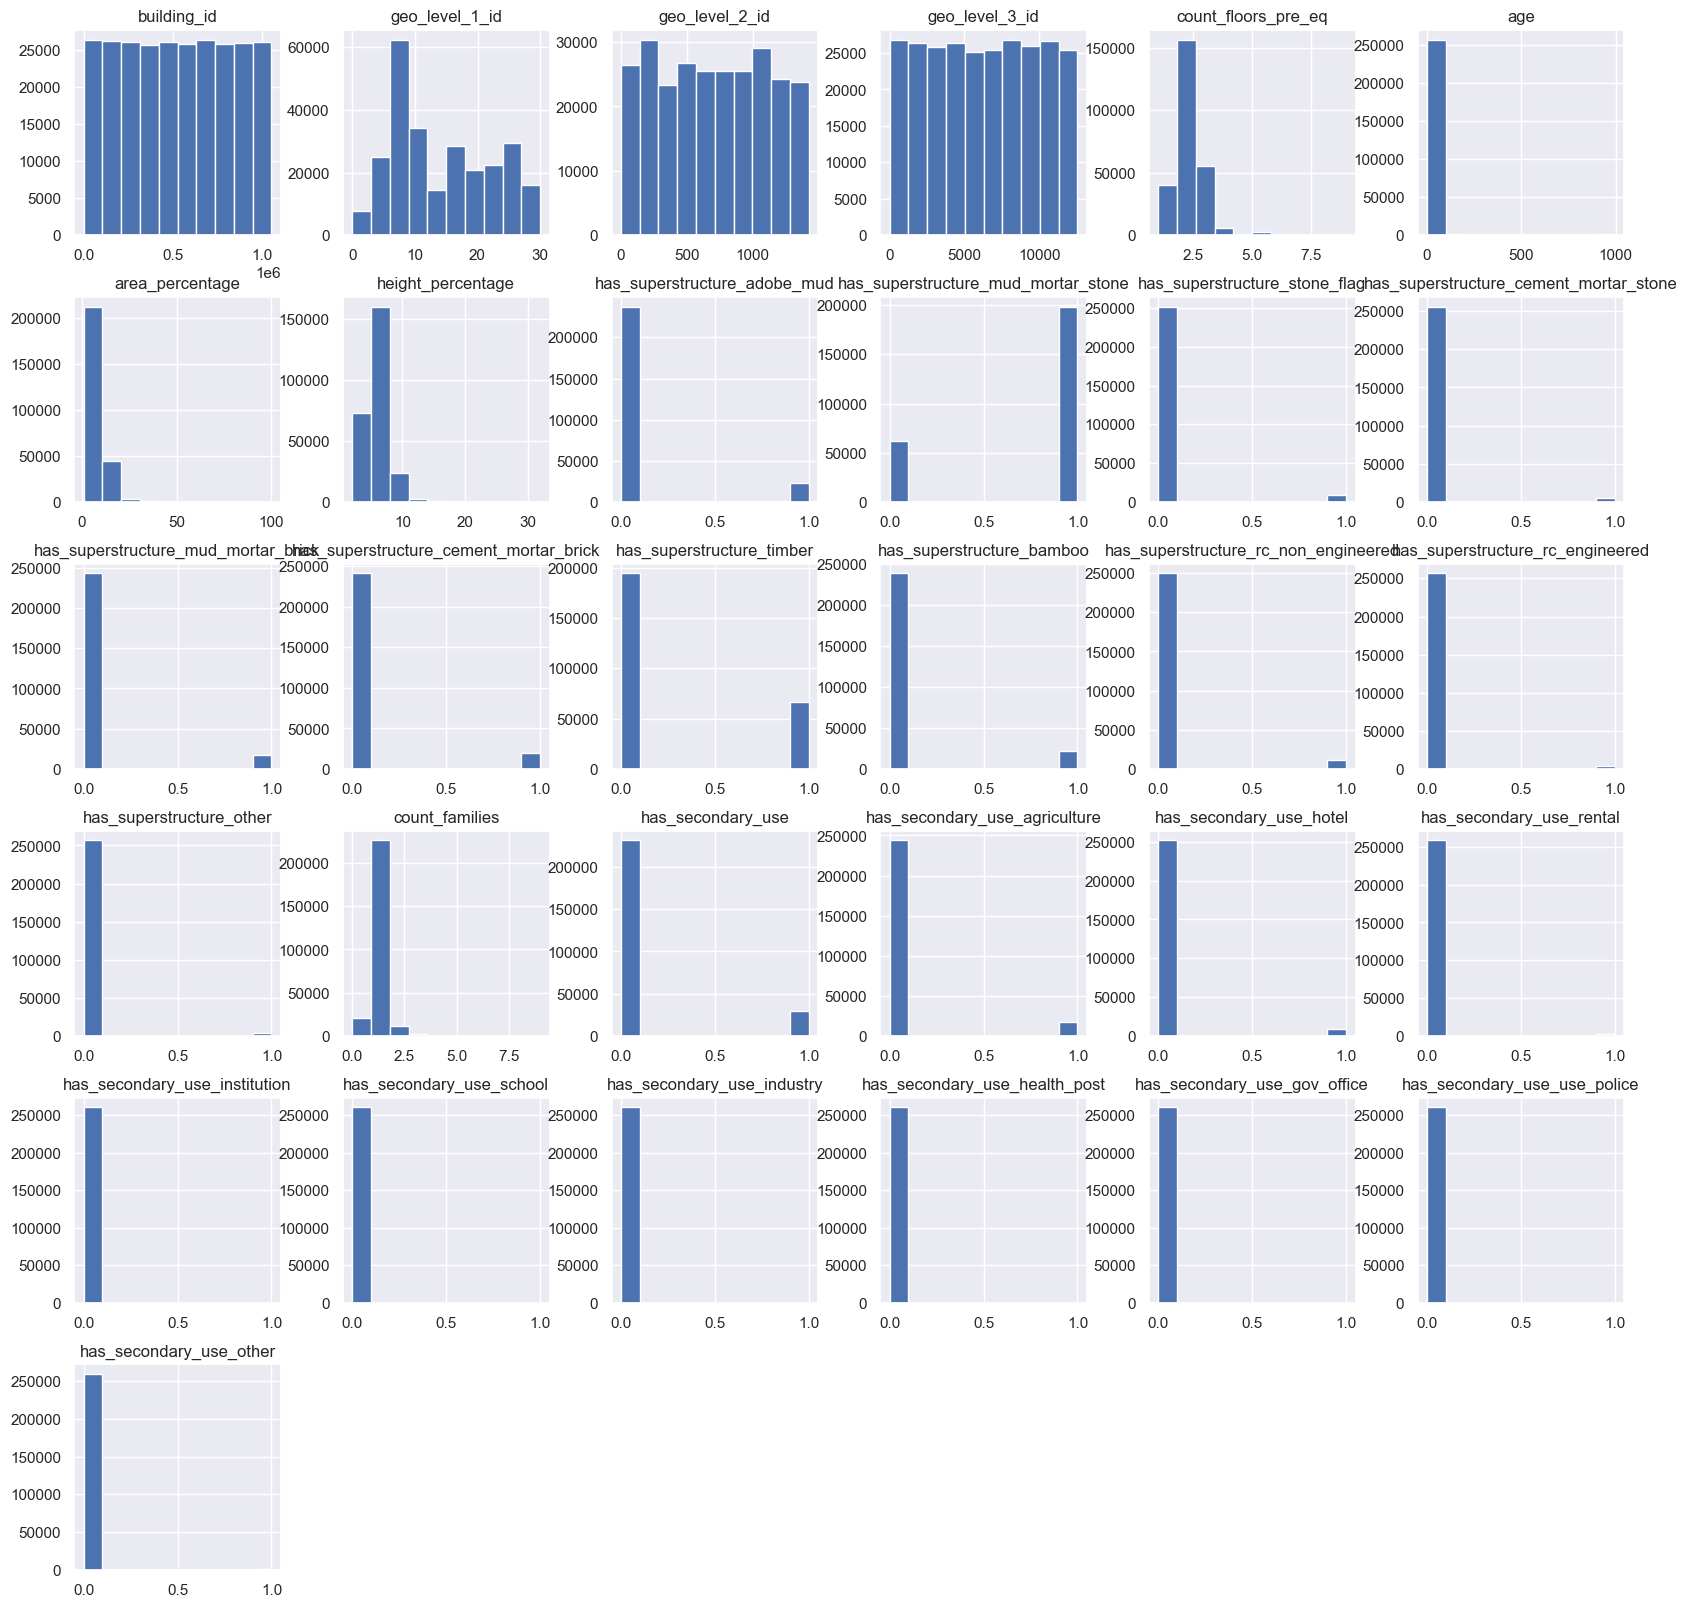

In [73]:
df[numeric_cols].hist(figsize=(20, 20))

In [74]:
df[numeric_cols].plot(kind="box", subplots=True, layout=(4, 4), figsize=(20, 20))

ValueError: Layout of 4x4 must be larger than required size 31

<Figure size 2000x2000 with 0 Axes>